# Loan Approval Prediction System

Installing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading the dataset

train = pd.read_csv("data/train.csv")

test = pd.read_csv("data/test.csv")

In [5]:
# making copy of the original data
train_original = train.copy()
test_original = test.copy()

## Basic Data Exploration

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- a very few null values, good for us;

- object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

- int64: It represents the integer variables. ApplicantIncome is of this format.

- float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


- same . here too, only few data points are missing;

In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
print('Training data shape: ', train.shape)

Training data shape:  (614, 13)


In [13]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [16]:
print('Test data shape: ', test.shape)

Test data shape:  (367, 12)


- We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

### Basic EDA 

- Note: Our target variable is "Loan_Status"
- As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

### Loan_Status Column

In [18]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

- Among 614 Loan_Status : Accepted : 422 Rejected : 192

In [19]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

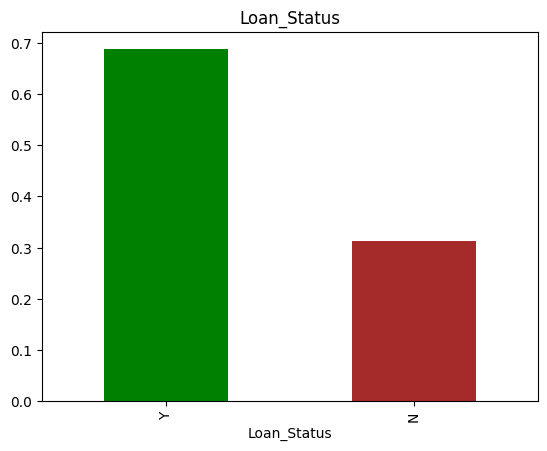

In [23]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status', color=["Green","Brown"])

The loan of 422(around 68.7%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

#### Now lets check independent Variables too;

### Gender Column

In [24]:
train["Gender"].count()

np.int64(601)

In [25]:
train["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

- Among 601 person: Male : 489 Female : 112

In [27]:
train['Gender'].value_counts(normalize=True)*100

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

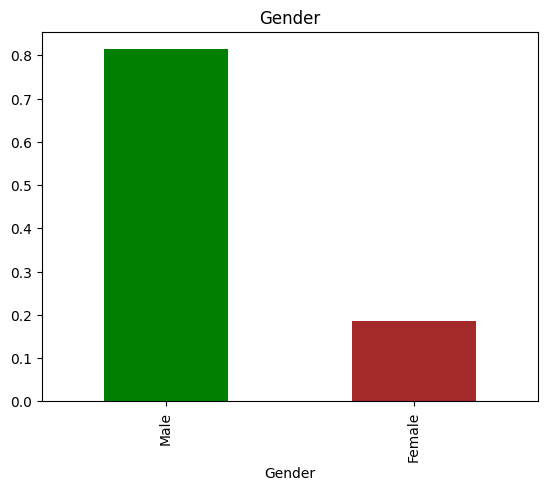

In [31]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color=["green","brown"])

- In our train dataset the "Gender" variable contain Male : 81% Female: 19%

### Married Column

In [33]:
train["Married"].count()

np.int64(611)

In [34]:
train["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [35]:
train['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

<Axes: title={'center': 'Married'}, xlabel='Married'>

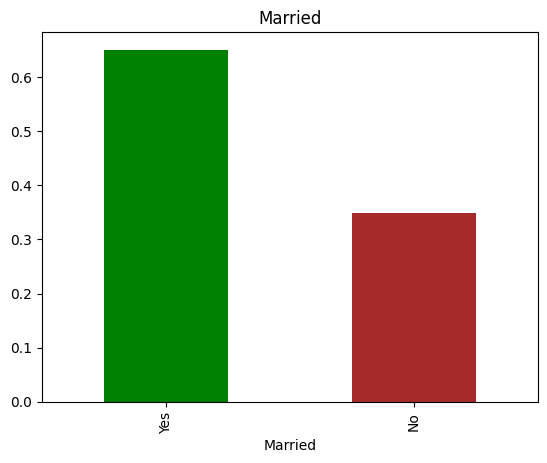

In [40]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=["green","brown"])

Number of married people : 65%

Number of unmarried people : 35%

### Self_Employed Column

In [41]:
train["Self_Employed"].count()

np.int64(582)

In [42]:
train["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [43]:
train['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

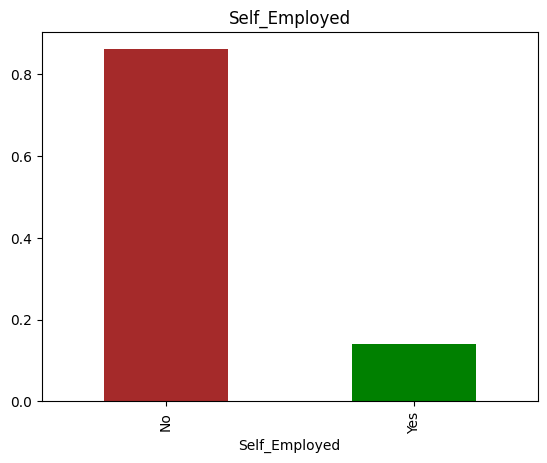

In [47]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color=["brown","green"])

Woah!
- Among 582 people only 14% are Self_Employed 
- rest of the 86% are Not_Self_Employed

### Credit_History Column

In [48]:
train["Credit_History"].count()

np.int64(564)

In [49]:
train["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

- Repaid Debts : 475
- Not Repaid Debts : 89

That's good , most of the debts are repaid,

In [50]:
train['Credit_History'].value_counts(normalize=True)*100

Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

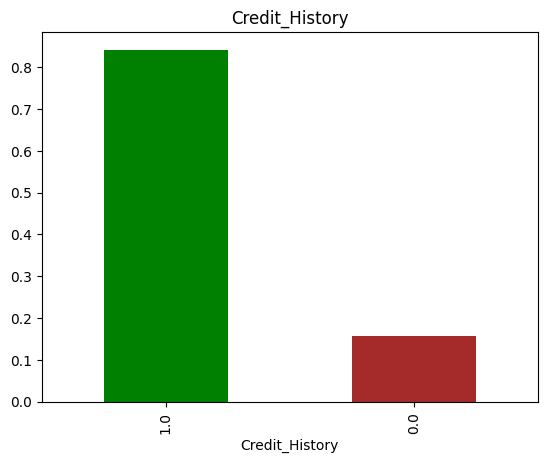

In [52]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color=["green","brown"])

Around 84% applicants have repaid their debts.

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

### Ordinal Features

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

#### Dependents Column

In [53]:
train['Dependents'].count()

np.int64(599)

In [54]:
train["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

In [56]:
train['Dependents'].value_counts(normalize=True)*100

Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

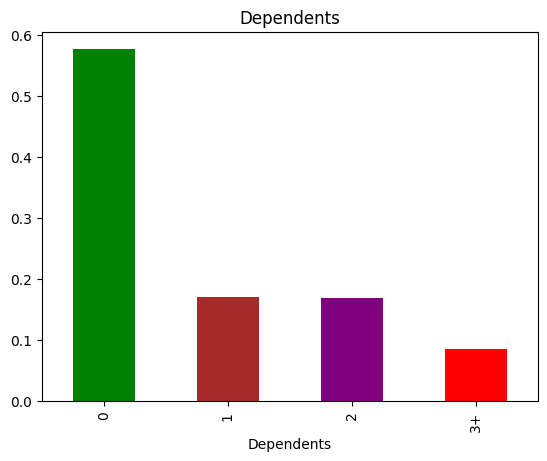

In [59]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents",color=["green","brown","purple","Red"])


58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

#### Education Column

In [60]:
train["Education"].count()

np.int64(614)

In [61]:
train["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

People who are Graduated : 480

People who are not Graduated : 134

In [62]:
train["Education"].value_counts(normalize=True)*100

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

<Axes: title={'center': 'Education'}, xlabel='Education'>

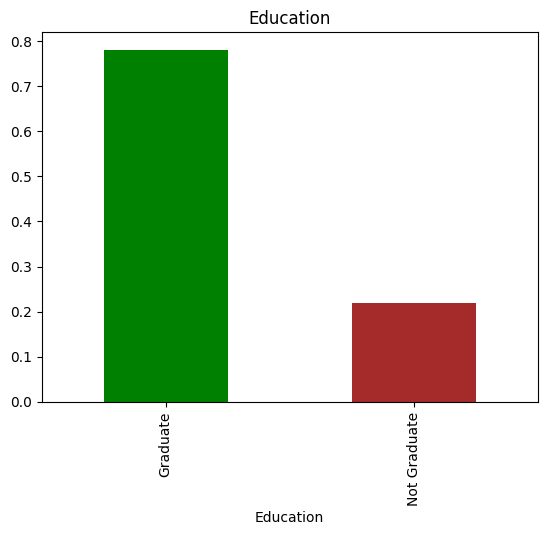

In [64]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education",color=["green","brown"])

- 78% are Graduated
- 22% are not Graduated

#### Property_Area Column

In [65]:
train["Property_Area"].count()

np.int64(614)

In [66]:
train["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179

In [67]:
train["Property_Area"].value_counts(normalize=True)*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

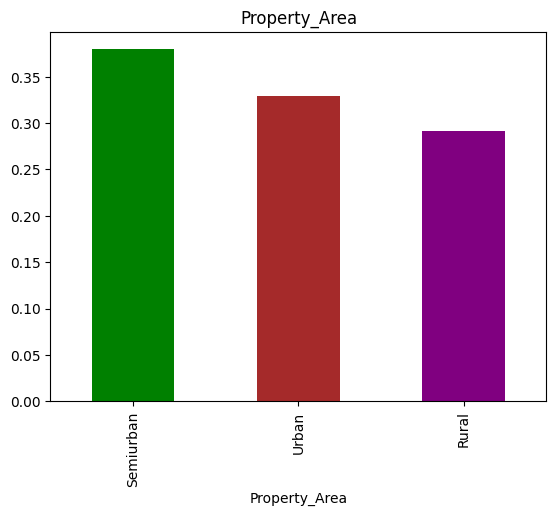

In [69]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area",color=["green","brown","purple"])

- Evenly Distributed:-

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

## Distribution of the columns

### Numerical Independent Variables

#### ApplicantIncome Column

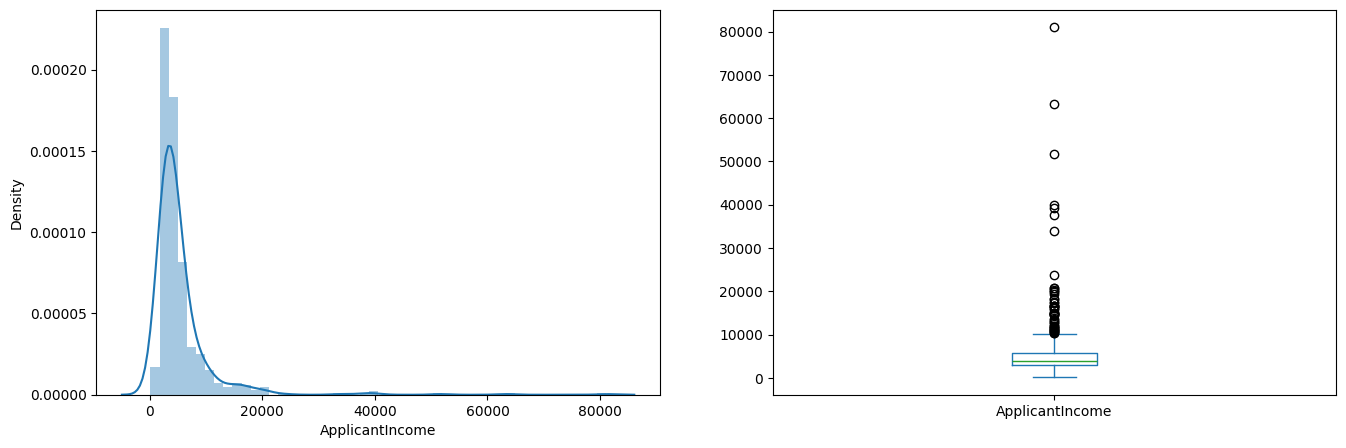

In [71]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Clearly, the data is left skewed and Not Normal;
- most of the data in the distribution of applicant income is towards left
- The boxplot confirms the presence of a lot of outliers/extreme values. 
- This can be bvz of the income disparity in the society.

Let us seperate this data/people by their Education Level:

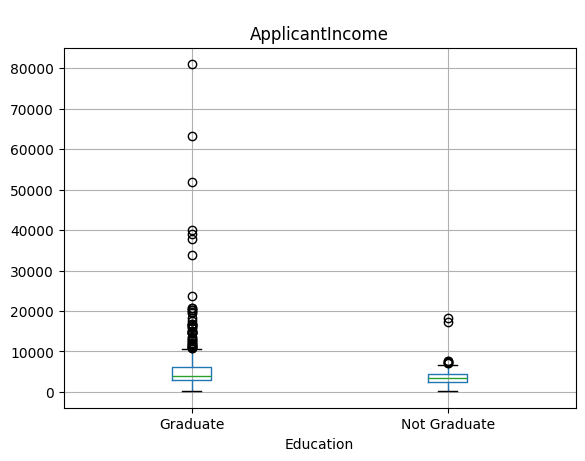

In [72]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

- Outliers are present in Graduates data;

#### CoapplicantIncome Column

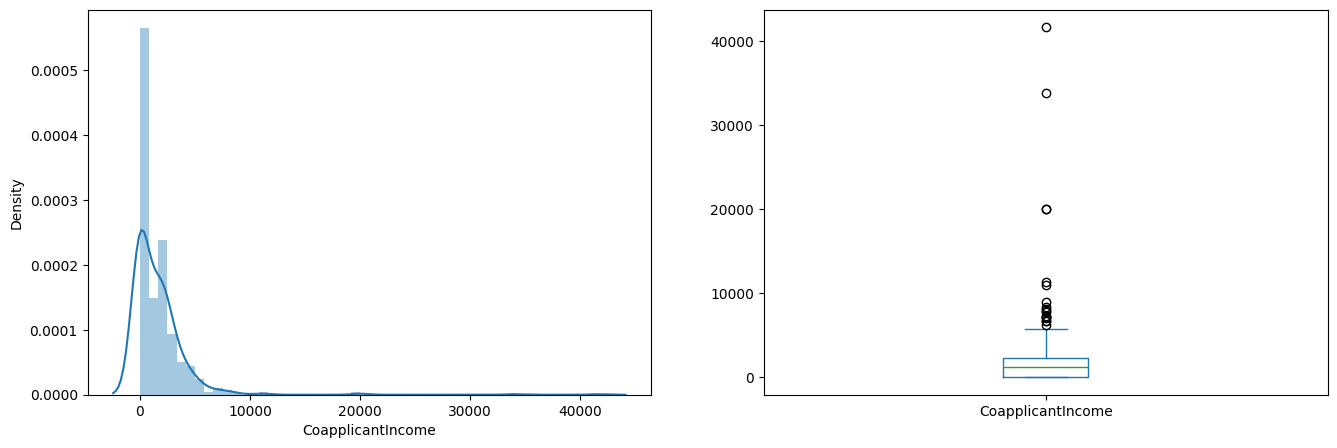

In [73]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

#### LoanAmount Column

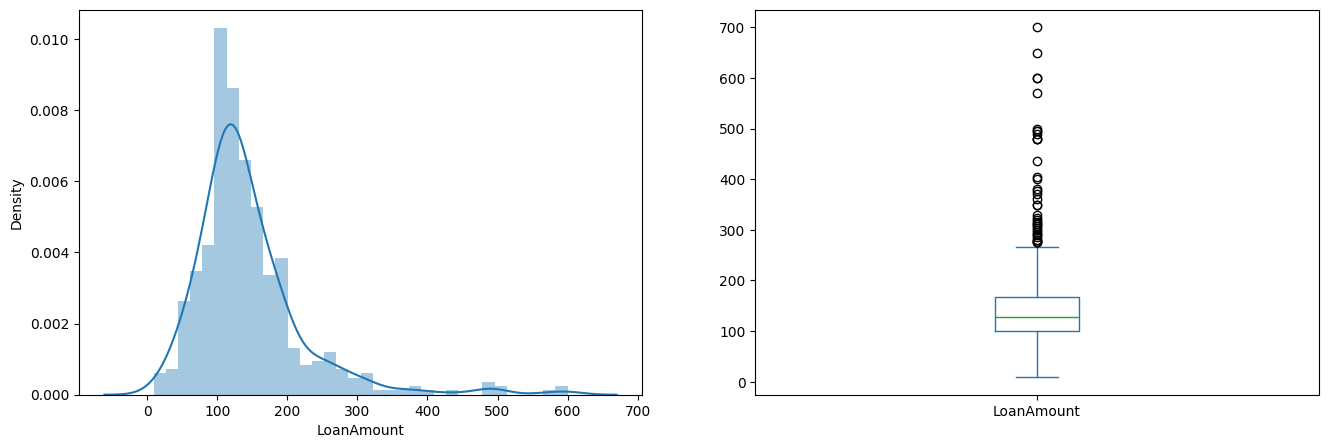

In [74]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

lot of outliers in this variable and the distribution is fairly normal.

#### LoanAmountTerm Column

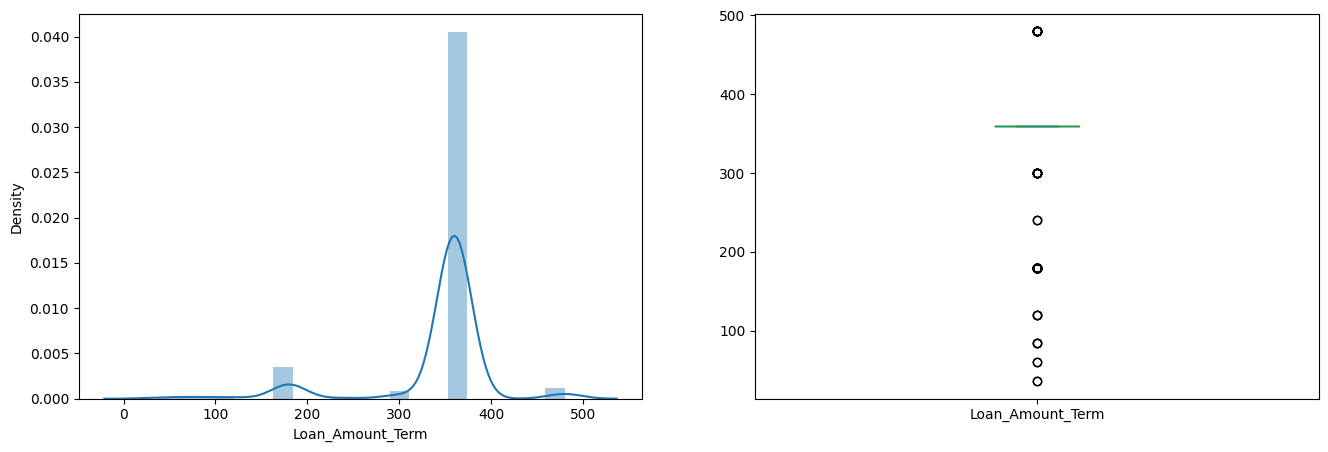

In [75]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

- similar to the LoanAmount Column

## Busting common norms, out there

First of all we will find the relation between target variable and categorical independent variables.

##### Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


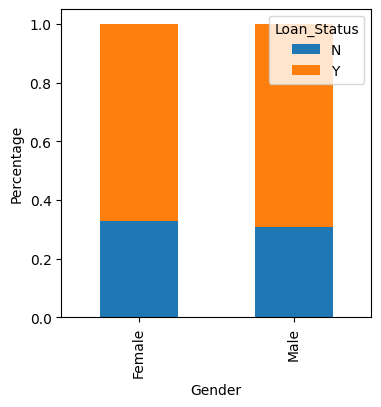

In [76]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Proportion of Male applicants is higher for the approved loans.

##### Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


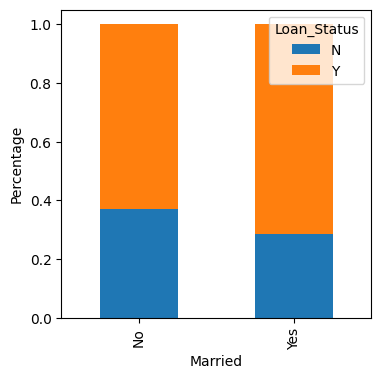

In [77]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Proportion of Married applicants is higher for the approved loans.

##### Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


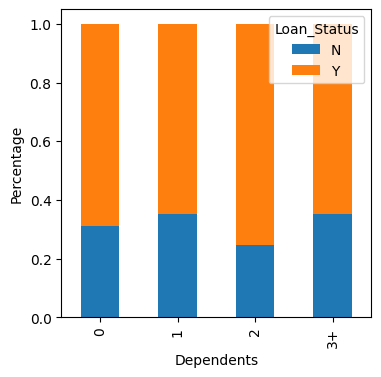

In [78]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

##### Relation between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


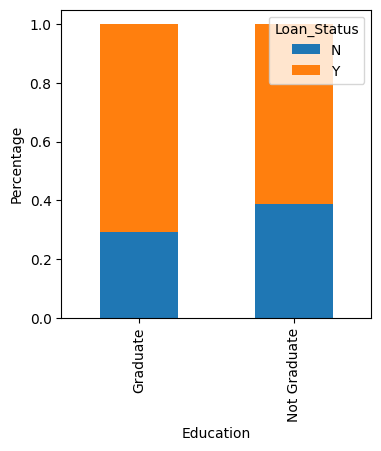

In [79]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Proportion of Graduate applicants is higher for the approved loans.

##### Relation between "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


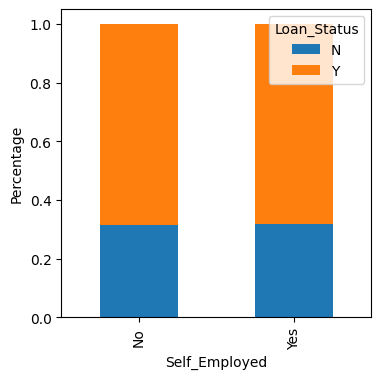

In [80]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

##### Relation between "Loan_Status" and "Credit_History"

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


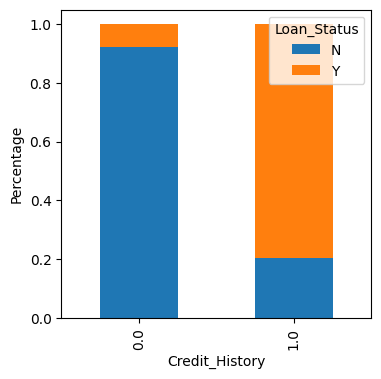

In [81]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.

##### Relation between "Loan_Status" and "Property_Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


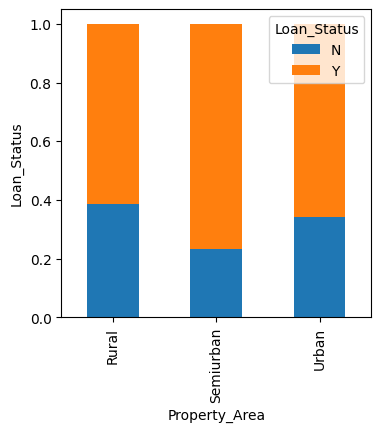

In [82]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Checking general hypotheses:-

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

##### Relation between "Loan_Status" and "Income" 

- We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.
- So that, we can, roughly, say that this is the avg income required for loan approval;

<Axes: xlabel='Loan_Status'>

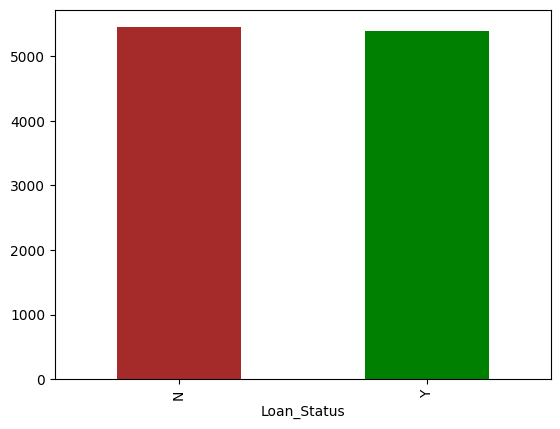

In [85]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar(color=["brown","green"])

We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [86]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


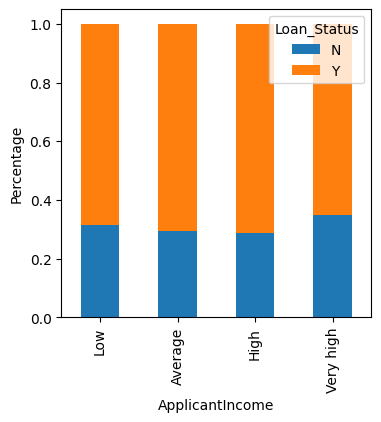

In [87]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

Well we can deduce that the Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar way.

In [88]:

bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


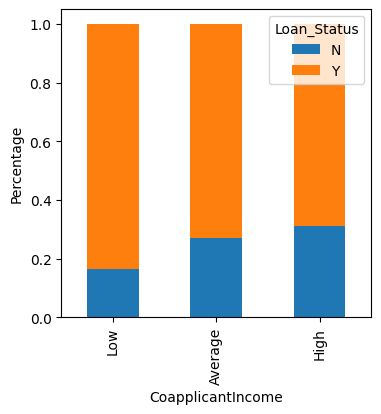

In [89]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()
     

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval

In [90]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [91]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


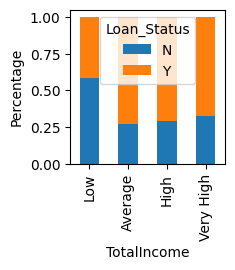

In [92]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

### Finding:->

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [93]:

bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


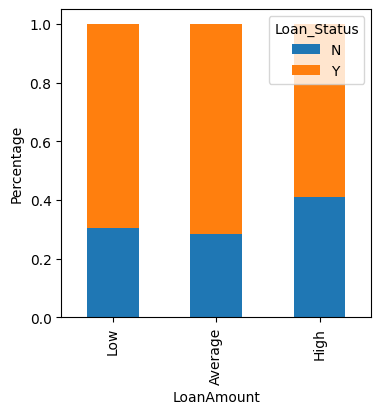

In [94]:

print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

### Finding:-

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

### Basic Exploration Done

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable

In [95]:
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [98]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. 

The variables with darker color means their correlation is more.

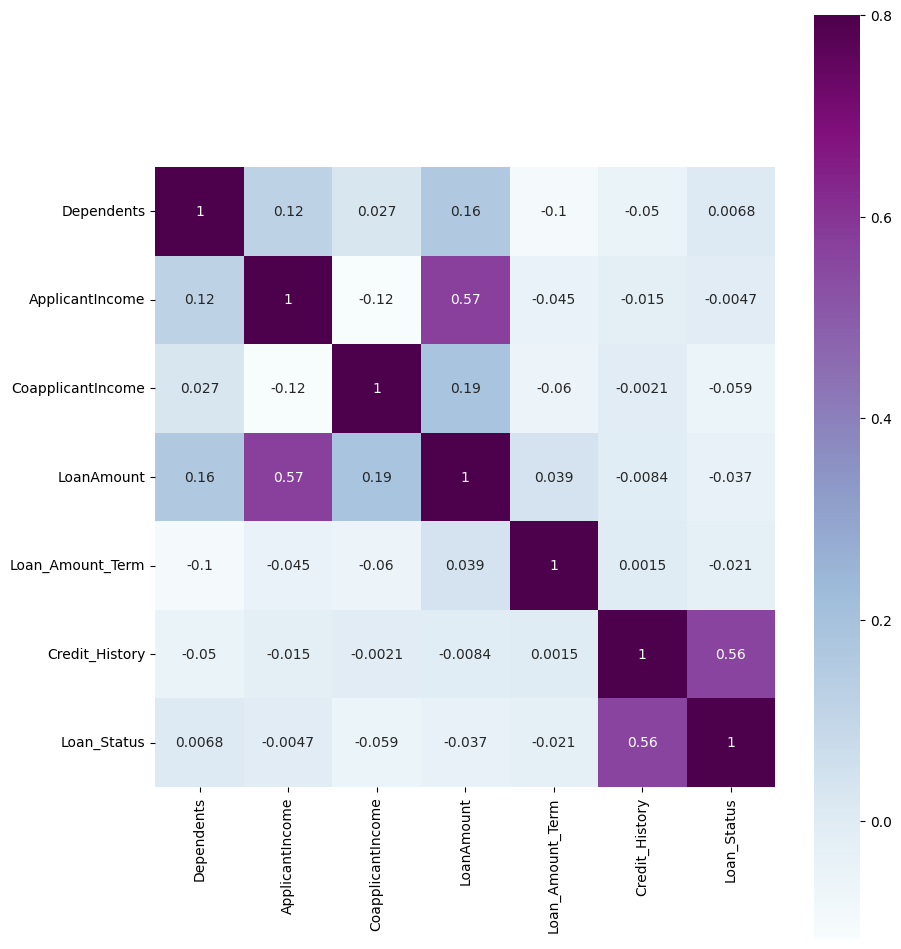

In [103]:
matrix = train.select_dtypes(include=['number']).corr()
#matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

Clearly, 
- the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status)

### Handling NaNs; Missing Value Imputation